### ___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


There is not any std > mean column

<AxesSubplot:xlabel='Exited', ylabel='count'>

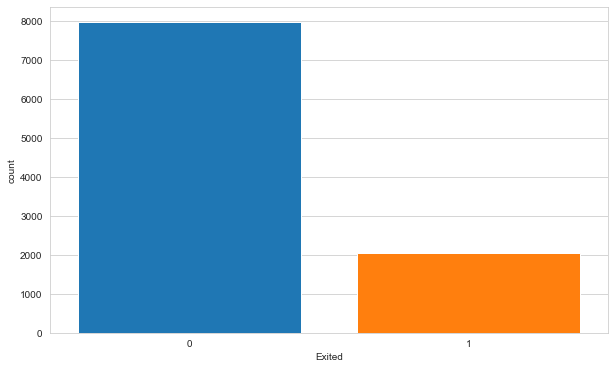

In [8]:
sns.countplot(df["Exited"], saturation = 50)

## RowNumber

In [9]:
df1 = df.copy()
df1.set_index("RowNumber", inplace = True)
df1.reset_index(drop = True, inplace= True)
df1 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [10]:
df1.shape

(10000, 13)

In [11]:
df = df1

<AxesSubplot:xlabel='Age', ylabel='Density'>

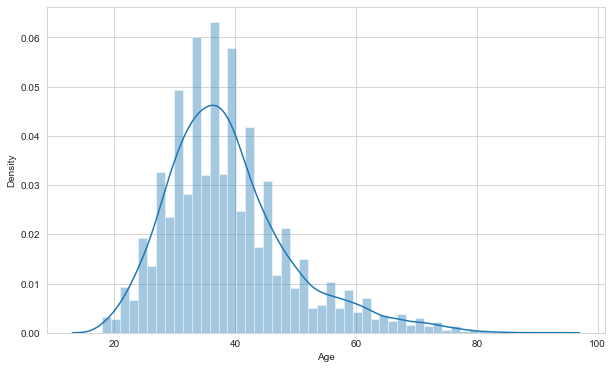

In [12]:
sns.distplot(df["Age"])

<AxesSubplot:>

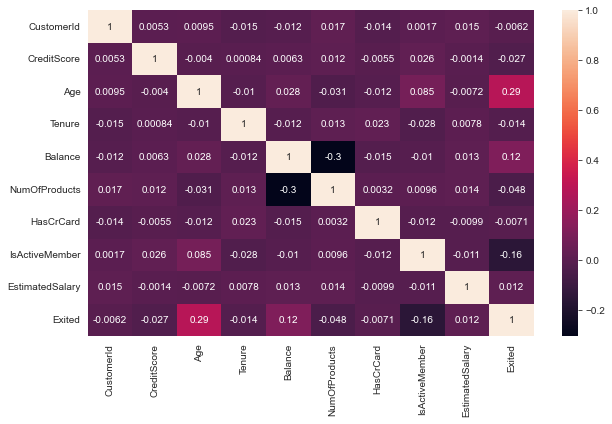

In [13]:
sns.heatmap(df.corr() , annot =True)

All correlations are lower than -/+ 0.3

## CustomerID

In [14]:
df.drop("CustomerId" , axis =1, inplace = True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


<AxesSubplot:xlabel='Exited', ylabel='Age'>

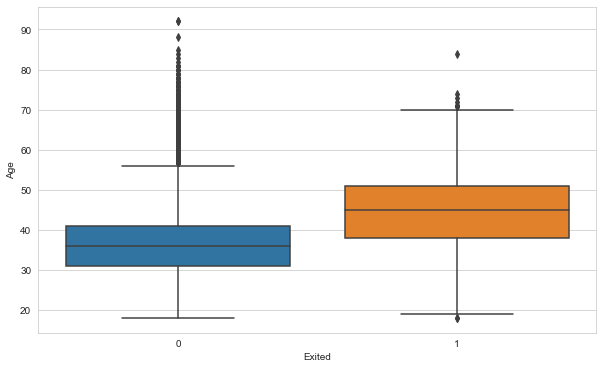

In [15]:
sns.boxplot(x = "Exited" , y = "Age" , data = df)

In [16]:
df.Age.describe()

count   10000.000
mean       38.922
std        10.488
min        18.000
25%        32.000
50%        37.000
75%        44.000
max        92.000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='Age'>

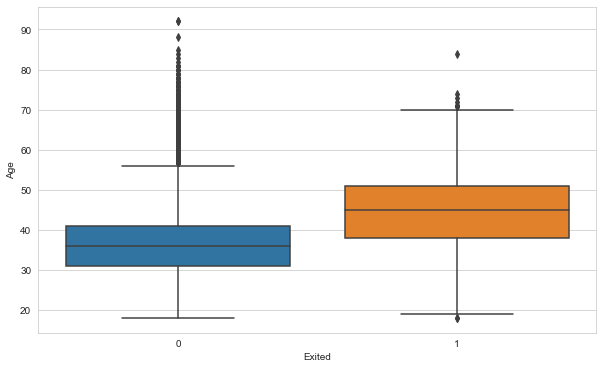

In [17]:
sns.boxplot(x = "Exited" , y = "Age" , data  = df)

The outlier age data has cleaned.

## CreditScore

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

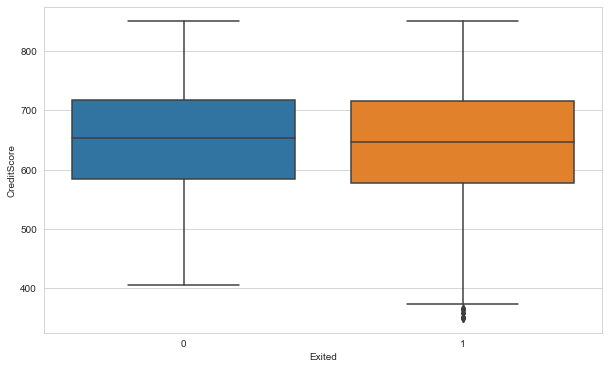

In [18]:
sns.boxplot(x = "Exited" , y = "CreditScore" , data  = df)

There is no outlier creditscore

## Geography

<AxesSubplot:xlabel='Geography', ylabel='count'>

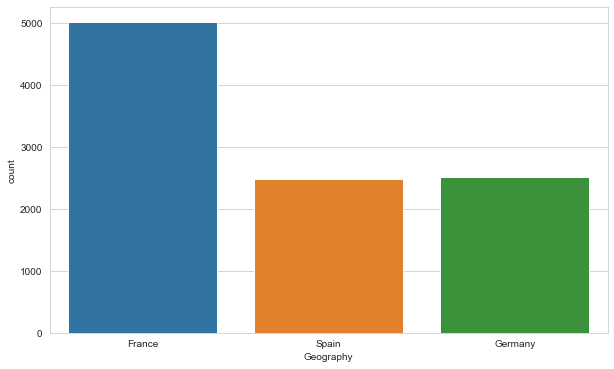

In [19]:
sns.countplot(df["Geography"])

## Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

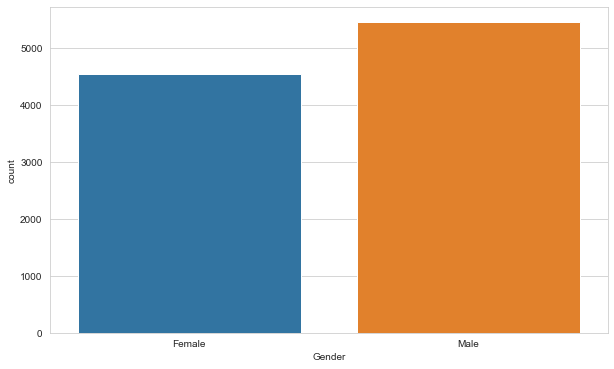

In [20]:
sns.countplot(df["Gender"])

## Tenure

<AxesSubplot:xlabel='Tenure', ylabel='count'>

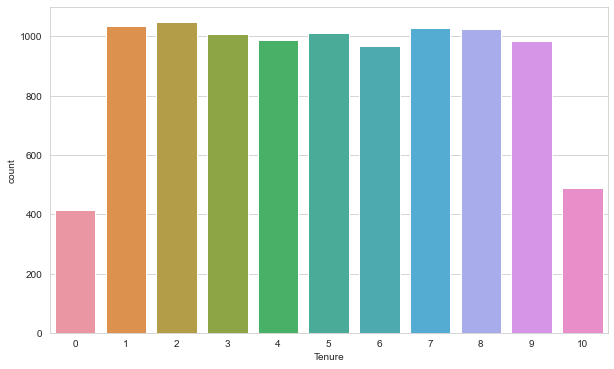

In [21]:
sns.countplot(df["Tenure"])

## Balance

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

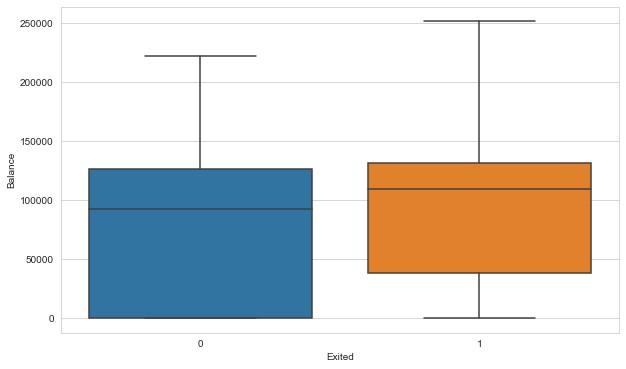

In [22]:
sns.boxplot(x = "Exited" , y = "Balance" , data = df)

## Number of Products

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

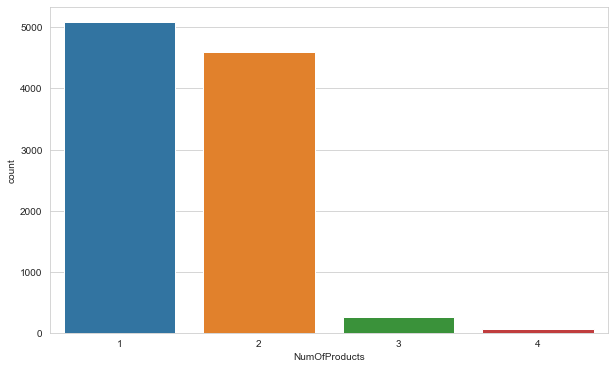

In [23]:
sns.countplot(df["NumOfProducts"])

## Has Credit Card

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

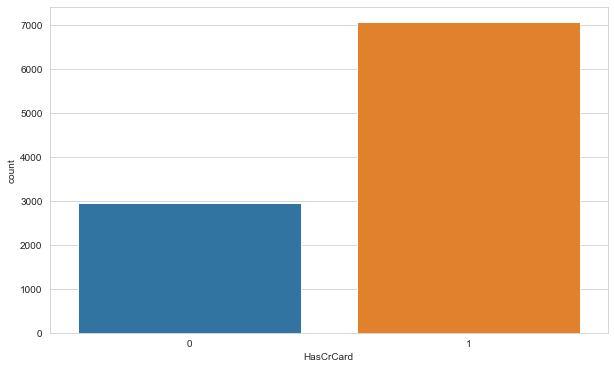

In [24]:
sns.countplot(df["HasCrCard"])

## IsActiveMember

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

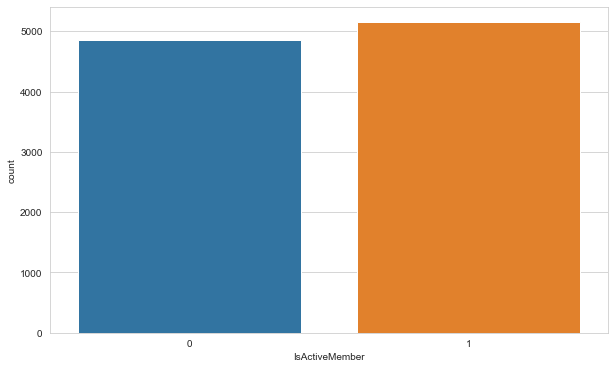

In [25]:
sns.countplot(df["IsActiveMember"])

## EstimatedSalary

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

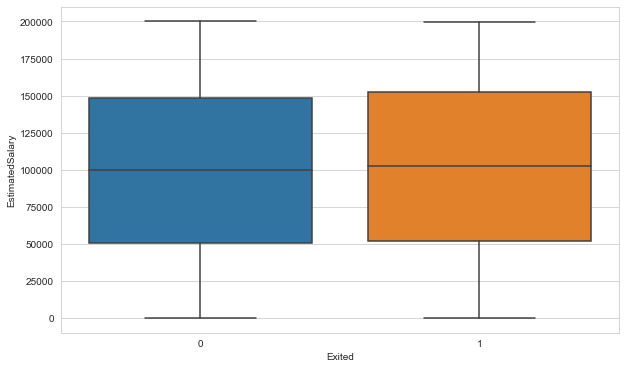

In [26]:
sns.boxplot(x = "Exited", y= "EstimatedSalary", data = df)

In [27]:
df.drop("Surname" , axis = 1 , inplace = True)

In [28]:
df.shape

(10000, 11)

# Preprocessing of Data
- Train | Test Split, Scalling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [30]:
seed = 42

In [31]:
enc = OrdinalEncoder()
df[["Geography","Gender"]] = enc.fit_transform(df[["Geography","Gender"]])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.000,0.000,42,2,0.000,1,1,1,101348.880,1
1,608,2.000,0.000,41,1,83807.860,1,0,1,112542.580,0
2,502,0.000,0.000,42,8,159660.800,3,1,0,113931.570,1
3,699,0.000,0.000,39,1,0.000,2,0,0,93826.630,0
4,850,2.000,0.000,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.000,1.000,39,5,0.000,2,1,0,96270.640,0
9996,516,0.000,1.000,35,10,57369.610,1,1,1,101699.770,0
9997,709,0.000,0.000,36,7,0.000,1,0,1,42085.580,1
9998,772,1.000,1.000,42,3,75075.310,2,1,0,92888.520,1


In [32]:
X = df.drop("Exited" , axis = 1)
y = df["Exited"]

In [33]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state= seed)

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weight

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu" , input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["Recall"])

In [39]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6795 - recall: 0.2022 - val_loss: 0.6215 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5496 - recall: 0.0000e+00 - val_loss: 0.4985 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4982 - recall: 0.0000e+00 - val_loss: 0.4860 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4861 - recall: 0.0000e+00 - val_loss: 0.4710 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4743 - recall: 0.0000e+00 - val_loss: 0.4579 - val_recall: 0.0000e+00
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4625 - recall: 0.0000e+00 - val_loss: 0.4465 - val_recall: 0.0000e+00
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4537 - recall: 0.0000e+00 - val_loss: 0.4363 - val_recall: 

64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - recall: 0.4243 - val_loss: 0.2972 - val_recall: 0.4972
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3458 - recall: 0.4304 - val_loss: 0.2972 - val_recall: 0.5414
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - recall: 0.4292 - val_loss: 0.2993 - val_recall: 0.5138
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - recall: 0.4334 - val_loss: 0.2996 - val_recall: 0.4972
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3462 - recall: 0.4298 - val_loss: 0.2991 - val_recall: 0.5635
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3441 - recall: 0.4213 - val_loss: 0.2991 - val_recall: 0.4862
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3446 - recall: 0.4280 - val_loss: 0.3041 - val_recall: 0.5193
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 3ms/step - loss: 0.3250 - recall: 0.4776 - val_loss: 0.2872 - val_recall: 0.5801
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3237 - recall: 0.4697 - val_loss: 0.2888 - val_recall: 0.5083
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3236 - recall: 0.4734 - val_loss: 0.2875 - val_recall: 0.5470
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3237 - recall: 0.4667 - val_loss: 0.2944 - val_recall: 0.5470
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3243 - recall: 0.4728 - val_loss: 0.2882 - val_recall: 0.4972
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3232 - recall: 0.4728 - val_loss: 0.2850 - val_recall: 0.5359
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3235 - recall: 0.4715 - val_loss: 0.2871 - val_recall: 0.5304
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3170 - recall: 0.4879 - val_loss: 0.2887 - val_recall: 0.5138
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3202 - recall: 0.4903 - val_loss: 0.2902 - val_recall: 0.5414
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3177 - recall: 0.4903 - val_loss: 0.2921 - val_recall: 0.5359
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3190 - recall: 0.4837 - val_loss: 0.2903 - val_recall: 0.5138
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3180 - recall: 0.4855 - val_loss: 0.2903 - val_recall: 0.5138
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3197 - recall: 0.4831 - val_loss: 0.2941 - val_recall: 0.5028
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3191 - recall: 0.4824 - val_loss: 0.2900 - val_recall: 0.6188
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3145 - recall: 0.4976 - val_loss: 0.2882 - val_recall: 0.6188
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3148 - recall: 0.4970 - val_loss: 0.2888 - val_recall: 0.6188
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3140 - recall: 0.5012 - val_loss: 0.2954 - val_recall: 0.5249
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3139 - recall: 0.4988 - val_loss: 0.2902 - val_recall: 0.5359
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3125 - recall: 0.4988 - val_loss: 0.2960 - val_recall: 0.5359


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

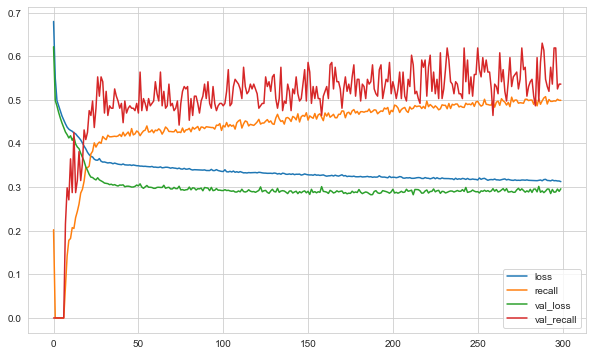

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [42]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[762  34]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 1ms/step


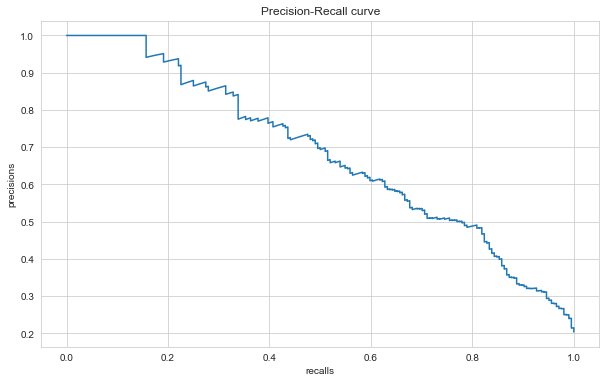

In [43]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [44]:
average_precision_score(y_test, y_pred_proba)

0.6833048880960125

## ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)

32/32 [==============================] - 0s 2ms/step


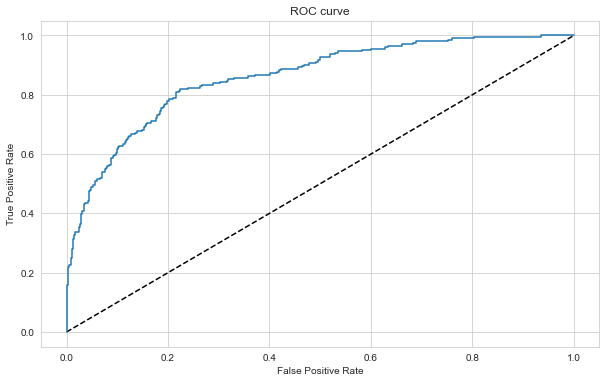

In [45]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## with class_weight

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [46]:
from sklearn.utils import class_weight

In [47]:
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )

class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [48]:
model.fit(X_train,
          y_train,
          validation_split = 0.1,
          batch_size = 128, epochs = 300, class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.4498 - recall: 0.7591 - val_loss: 0.4099 - val_recall: 0.8232
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4338 - recall: 0.7778 - val_loss: 0.4410 - val_recall: 0.8508
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4273 - recall: 0.7821 - val_loss: 0.3625 - val_recall: 0.7680
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4274 - recall: 0.7857 - val_loss: 0.3989 - val_recall: 0.8066
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4326 - recall: 0.7881 - val_loss: 0.3516 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4272 - recall: 0.7881 - val_loss: 0.3581 - val_recall: 0.7624
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4242 - recall: 0.7887 - val_loss: 0.3912 - val_recall: 0.8066
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4132 - recall: 0.7990 - val_loss: 0.3906 - val_recall: 0.7624
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4126 - recall: 0.8039 - val_loss: 0.4007 - val_recall: 0.7956
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4116 - recall: 0.8033 - val_loss: 0.4323 - val_recall: 0.8066
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4178 - recall: 0.8057 - val_loss: 0.3510 - val_recall: 0.7348
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4151 - recall: 0.7960 - val_loss: 0.3975 - val_recall: 0.7569
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4115 - recall: 0.8002 - val_loss: 0.3975 - val_recall: 0.7569
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4131 - recall: 0.8093 - val_loss: 0.4081 - val_recall: 0.8011
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4115 - recall: 0.7936 - val_loss: 0.4176 - val_recall: 0.8287
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4073 - recall: 0.7936 - val_loss: 0.3734 - val_recall: 0.7680
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4064 - recall: 0.8069 - val_loss: 0.4172 - val_recall: 0.7956
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4081 - recall: 0.8069 - val_loss: 0.4378 - val_recall: 0.8066
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4079 - recall: 0.8051 - val_loss: 0.3707 - val_recall: 0.7403
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4064 - recall: 0.8021 - val_loss: 0.3874 - val_recall: 0.7845
Epoch 184/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4075 - recall: 0.8075 - val_loss: 0.3998 - val_recall: 0.7845
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4014 - recall: 0.8154 - val_loss: 0.3681 - val_recall: 0.7403
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4087 - recall: 0.8045 - val_loss: 0.4271 - val_recall: 0.8122
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4029 - recall: 0.8099 - val_loss: 0.4126 - val_recall: 0.7901
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4050 - recall: 0.8015 - val_loss: 0.3753 - val_recall: 0.7624
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4025 - recall: 0.8051 - val_loss: 0.3823 - val_recall: 0.7790
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4051 - recall: 0.8117 - val_loss: 0.3546 - val_recall: 0.7127
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4062 - recall: 0.7990 - val_loss: 0.4412 - val_recall: 0.8398
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4011 - recall: 0.8039 - val_loss: 0.4234 - val_recall: 0.8177
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4014 - recall: 0.8021 - val_loss: 0.4210 - val_recall: 0.8122
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4014 - recall: 0.8081 - val_loss: 0.3837 - val_recall: 0.7514
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3997 - recall: 0.8105 - val_loss: 0.3613 - val_recall: 0.7459
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3982 - recall: 0.8027 - val_loss: 0.4028 - val_recall: 0.7845


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

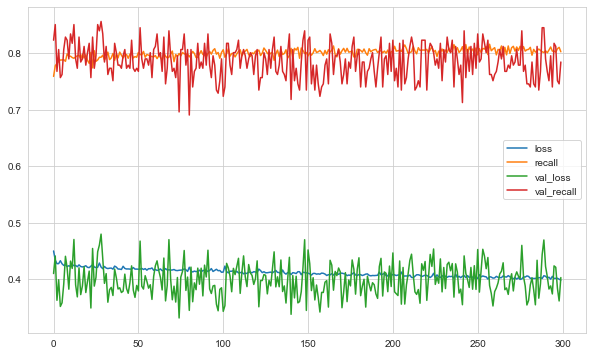

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [51]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[641 155]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       796
           1       0.50      0.76      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.80      0.81      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 1ms/step


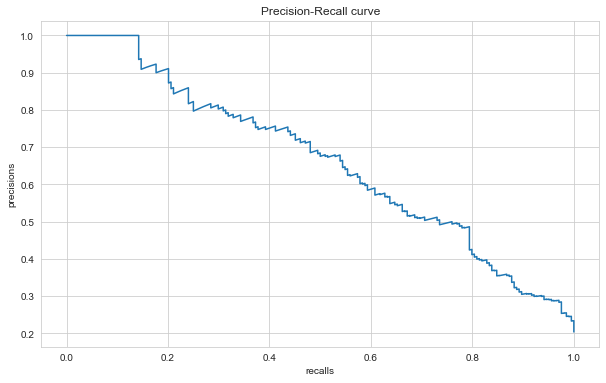

In [52]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [53]:
average_precision_score(y_test, y_pred_proba)

0.6620257218599085

## ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)

32/32 [==============================] - 0s 1ms/step


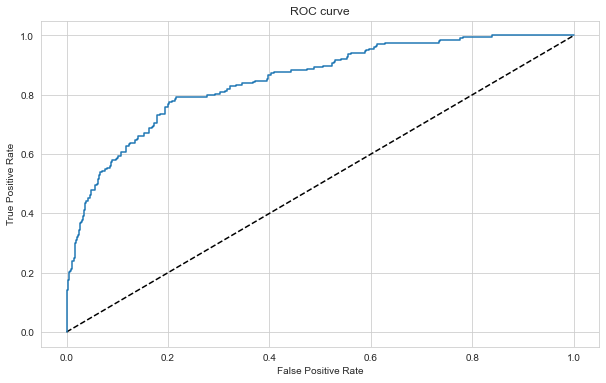

In [54]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### Increase The Learning Rate and Observe The Results

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [56]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6537 - recall: 0.7627 - val_loss: 0.6154 - val_recall: 0.7514
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5723 - recall: 0.7022 - val_loss: 0.5648 - val_recall: 0.8619
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5268 - recall: 0.7258 - val_loss: 0.5278 - val_recall: 0.8398
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5079 - recall: 0.7433 - val_loss: 0.5431 - val_recall: 0.8508
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5130 - recall: 0.7343 - val_loss: 0.4195 - val_recall: 0.7127
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5023 - recall: 0.7361 - val_loss: 0.4321 - val_recall: 0.7790
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4981 - recall: 0.7518 - val_loss: 0.4328 - val_recall: 0.7569
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4011 - recall: 0.8160 - val_loss: 0.4209 - val_recall: 0.7735
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3952 - recall: 0.8178 - val_loss: 0.4436 - val_recall: 0.8011
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3950 - recall: 0.8305 - val_loss: 0.4423 - val_recall: 0.7790
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3999 - recall: 0.8281 - val_loss: 0.4097 - val_recall: 0.7680
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3980 - recall: 0.8111 - val_loss: 0.4138 - val_recall: 0.7127
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3975 - recall: 0.8208 - val_loss: 0.4298 - val_recall: 0.7790
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3972 - recall: 0.8202 - val_loss: 0.4284 - val_recall: 0.7624
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3735 - recall: 0.8390 - val_loss: 0.4603 - val_recall: 0.7901
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3708 - recall: 0.8426 - val_loss: 0.4720 - val_recall: 0.7901
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3721 - recall: 0.8432 - val_loss: 0.4709 - val_recall: 0.7901
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3726 - recall: 0.8414 - val_loss: 0.4907 - val_recall: 0.8343
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3730 - recall: 0.8402 - val_loss: 0.4323 - val_recall: 0.7680
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3708 - recall: 0.8426 - val_loss: 0.4734 - val_recall: 0.7956
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3685 - recall: 0.8450 - val_loss: 0.4568 - val_recall: 0.7956
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3557 - recall: 0.8674 - val_loss: 0.4380 - val_recall: 0.7182
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3562 - recall: 0.8535 - val_loss: 0.4985 - val_recall: 0.7901
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3590 - recall: 0.8602 - val_loss: 0.4731 - val_recall: 0.7735
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3585 - recall: 0.8608 - val_loss: 0.4885 - val_recall: 0.8066
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3533 - recall: 0.8584 - val_loss: 0.4842 - val_recall: 0.7901
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3576 - recall: 0.8608 - val_loss: 0.4646 - val_recall: 0.7901
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3512 - recall: 0.8517 - val_loss: 0.5217 - val_recall: 0.7845
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3451 - recall: 0.8608 - val_loss: 0.5531 - val_recall: 0.7845
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3445 - recall: 0.8705 - val_loss: 0.5015 - val_recall: 0.7735
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3471 - recall: 0.8577 - val_loss: 0.4730 - val_recall: 0.7293
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - recall: 0.8674 - val_loss: 0.5109 - val_recall: 0.8066
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3461 - recall: 0.8674 - val_loss: 0.5204 - val_recall: 0.7680


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                352       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

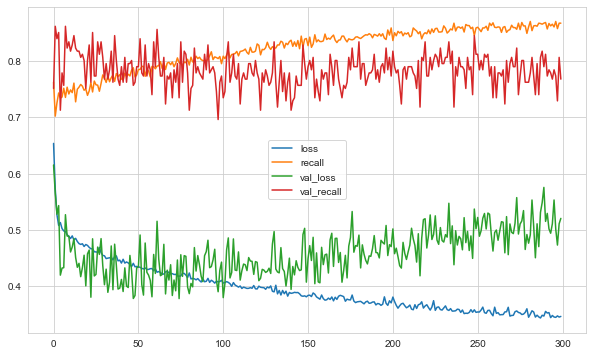

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [59]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Lr = 0.005 causes overfitting, let's try 0.01

32/32 [==============================] - 0s 1ms/step
[[616 180]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.47      0.77      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.84      0.77      0.79      1000



Lr = 0.01

In [60]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.01)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [61]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6478 - recall: 0.6810 - val_loss: 0.5230 - val_recall: 0.4862
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5850 - recall: 0.6568 - val_loss: 0.4666 - val_recall: 0.4862
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5608 - recall: 0.6895 - val_loss: 0.4895 - val_recall: 0.7293
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5321 - recall: 0.7191 - val_loss: 0.5058 - val_recall: 0.7901
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5303 - recall: 0.7143 - val_loss: 0.4379 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5060 - recall: 0.7355 - val_loss: 0.4967 - val_recall: 0.8122
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4929 - recall: 0.7542 - val_loss: 0.3770 - val_recall: 0.7403
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4151 - recall: 0.8045 - val_loss: 0.4075 - val_recall: 0.7790
Epoch 120/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4160 - recall: 0.7990 - val_loss: 0.4323 - val_recall: 0.8066
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4074 - recall: 0.8105 - val_loss: 0.4840 - val_recall: 0.8453
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4151 - recall: 0.8130 - val_loss: 0.3760 - val_recall: 0.7293
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4137 - recall: 0.8039 - val_loss: 0.4130 - val_recall: 0.8066
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4109 - recall: 0.8099 - val_loss: 0.4619 - val_recall: 0.8066
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4088 - recall: 0.8142 - val_loss: 0.4414 - val_recall: 0.7901
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3934 - recall: 0.8148 - val_loss: 0.4255 - val_recall: 0.8066
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3941 - recall: 0.8172 - val_loss: 0.4074 - val_recall: 0.7845
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3916 - recall: 0.8232 - val_loss: 0.4284 - val_recall: 0.8011
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3870 - recall: 0.8305 - val_loss: 0.4422 - val_recall: 0.8287
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3966 - recall: 0.8238 - val_loss: 0.3887 - val_recall: 0.7790
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3889 - recall: 0.8214 - val_loss: 0.3975 - val_recall: 0.7901
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3914 - recall: 0.8232 - val_loss: 0.3951 - val_recall: 0.8287
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3773 - recall: 0.8329 - val_loss: 0.4096 - val_recall: 0.7680
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3775 - recall: 0.8323 - val_loss: 0.4612 - val_recall: 0.8011
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3762 - recall: 0.8323 - val_loss: 0.4453 - val_recall: 0.7956
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3773 - recall: 0.8329 - val_loss: 0.4208 - val_recall: 0.7790
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3722 - recall: 0.8372 - val_loss: 0.4095 - val_recall: 0.7901
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3768 - recall: 0.8281 - val_loss: 0.3891 - val_recall: 0.7735
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3868 - recall: 0.8257 - val_loss: 0.4889 - val_recall: 0.8177
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3721 - recall: 0.8238 - val_loss: 0.4775 - val_recall: 0.8232
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3713 - recall: 0.8366 - val_loss: 0.4461 - val_recall: 0.8122
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3675 - recall: 0.8317 - val_loss: 0.4305 - val_recall: 0.8011
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3637 - recall: 0.8481 - val_loss: 0.4087 - val_recall: 0.7680
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3618 - recall: 0.8335 - val_loss: 0.4277 - val_recall: 0.7790


In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                352       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

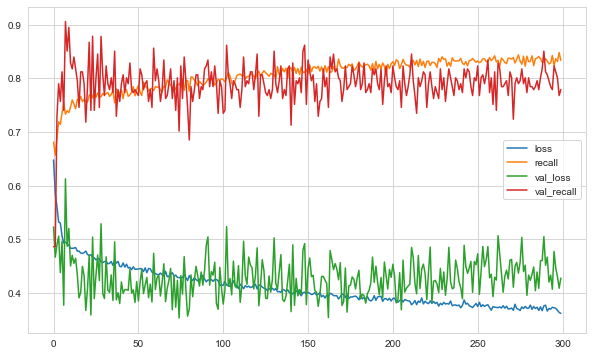

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [64]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Slightly better

32/32 [==============================] - 0s 1ms/step
[[629 167]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.73      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



Lr = 0.02 

In [65]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.02)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [66]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6389 - recall: 0.6453 - val_loss: 0.5498 - val_recall: 0.6354
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5559 - recall: 0.6949 - val_loss: 0.4413 - val_recall: 0.6298
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5218 - recall: 0.7064 - val_loss: 0.4432 - val_recall: 0.7514
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5034 - recall: 0.7361 - val_loss: 0.5166 - val_recall: 0.8453
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5037 - recall: 0.7300 - val_loss: 0.3931 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4983 - recall: 0.7312 - val_loss: 0.4613 - val_recall: 0.8011
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4915 - recall: 0.7548 - val_loss: 0.4041 - val_recall: 0.7901
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4395 - recall: 0.7700 - val_loss: 0.4729 - val_recall: 0.8122
Epoch 120/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4320 - recall: 0.7669 - val_loss: 0.4439 - val_recall: 0.8287
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4323 - recall: 0.7984 - val_loss: 0.4666 - val_recall: 0.8453
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4378 - recall: 0.7881 - val_loss: 0.3989 - val_recall: 0.7790
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4274 - recall: 0.7682 - val_loss: 0.4367 - val_recall: 0.8122
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4318 - recall: 0.7597 - val_loss: 0.4299 - val_recall: 0.8066
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4345 - recall: 0.7918 - val_loss: 0.4456 - val_recall: 0.8232
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4262 - recall: 0.7900 - val_loss: 0.4628 - val_recall: 0.8287
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4216 - recall: 0.7748 - val_loss: 0.4400 - val_recall: 0.7790
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4203 - recall: 0.7906 - val_loss: 0.4752 - val_recall: 0.8398
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4240 - recall: 0.7900 - val_loss: 0.4995 - val_recall: 0.8619
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4311 - recall: 0.7900 - val_loss: 0.4115 - val_recall: 0.7680
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4191 - recall: 0.7827 - val_loss: 0.4818 - val_recall: 0.8343
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4183 - recall: 0.7900 - val_loss: 0.4333 - val_recall: 0.7901
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4250 - recall: 0.7833 - val_loss: 0.4171 - val_recall: 0.7735
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4220 - recall: 0.7887 - val_loss: 0.4324 - val_recall: 0.8011
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4169 - recall: 0.7887 - val_loss: 0.4637 - val_recall: 0.7845
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4101 - recall: 0.7936 - val_loss: 0.4521 - val_recall: 0.7901
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4231 - recall: 0.7857 - val_loss: 0.4062 - val_recall: 0.7680
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4184 - recall: 0.7869 - val_loss: 0.4200 - val_recall: 0.7845
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4145 - recall: 0.7857 - val_loss: 0.4784 - val_recall: 0.8066
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4146 - recall: 0.8045 - val_loss: 0.4829 - val_recall: 0.8232
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4161 - recall: 0.7918 - val_loss: 0.4745 - val_recall: 0.7956
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4093 - recall: 0.7996 - val_loss: 0.4260 - val_recall: 0.7790
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4145 - recall: 0.7906 - val_loss: 0.4463 - val_recall: 0.8011
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4158 - recall: 0.7984 - val_loss: 0.4710 - val_recall: 0.7790


<AxesSubplot:>

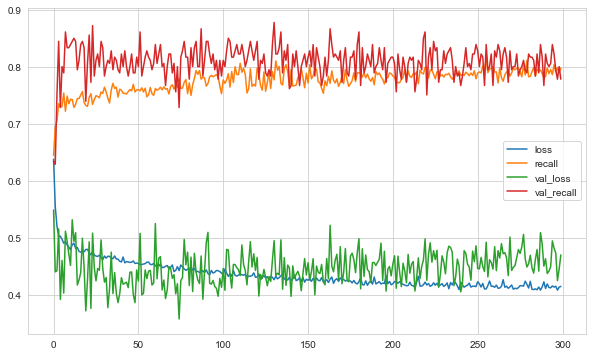

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [68]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Problem didn't fixed. Let's lower it then to 0.003

32/32 [==============================] - 0s 1ms/step
[[606 190]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       796
           1       0.44      0.73      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.76      0.77      1000



Lr = 0.003

In [69]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.003)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [70]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6623 - recall: 0.6798 - val_loss: 0.6349 - val_recall: 0.7072
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6141 - recall: 0.6622 - val_loss: 0.6606 - val_recall: 0.7901
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5863 - recall: 0.6774 - val_loss: 0.5812 - val_recall: 0.7735
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5580 - recall: 0.6949 - val_loss: 0.5819 - val_recall: 0.8066
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5440 - recall: 0.7040 - val_loss: 0.4512 - val_recall: 0.6961
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5305 - recall: 0.7070 - val_loss: 0.4485 - val_recall: 0.7348
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5160 - recall: 0.7446 - val_loss: 0.4295 - val_recall: 0.7403
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4191 - recall: 0.7984 - val_loss: 0.4160 - val_recall: 0.7735
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4158 - recall: 0.7954 - val_loss: 0.4324 - val_recall: 0.8011
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4133 - recall: 0.7954 - val_loss: 0.4902 - val_recall: 0.8343
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4192 - recall: 0.8057 - val_loss: 0.3715 - val_recall: 0.7238
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4140 - recall: 0.7996 - val_loss: 0.4117 - val_recall: 0.7845
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4155 - recall: 0.7924 - val_loss: 0.4078 - val_recall: 0.7845
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4162 - recall: 0.8045 - val_loss: 0.4080 - val_recall: 0.8066
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4022 - recall: 0.8027 - val_loss: 0.4376 - val_recall: 0.7901
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3987 - recall: 0.7954 - val_loss: 0.4297 - val_recall: 0.7845
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3994 - recall: 0.8021 - val_loss: 0.4344 - val_recall: 0.7735
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3981 - recall: 0.8063 - val_loss: 0.4547 - val_recall: 0.8122
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4030 - recall: 0.8015 - val_loss: 0.4129 - val_recall: 0.7459
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4018 - recall: 0.7966 - val_loss: 0.4468 - val_recall: 0.8177
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3973 - recall: 0.8027 - val_loss: 0.4301 - val_recall: 0.7790
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3883 - recall: 0.8178 - val_loss: 0.3950 - val_recall: 0.7514
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3865 - recall: 0.8123 - val_loss: 0.4878 - val_recall: 0.8011
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3905 - recall: 0.8081 - val_loss: 0.4692 - val_recall: 0.7956
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3898 - recall: 0.8166 - val_loss: 0.4285 - val_recall: 0.7845
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3887 - recall: 0.8172 - val_loss: 0.3978 - val_recall: 0.7238
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3883 - recall: 0.8123 - val_loss: 0.4209 - val_recall: 0.7514
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3855 - recall: 0.8087 - val_loss: 0.4950 - val_recall: 0.8122
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3835 - recall: 0.8111 - val_loss: 0.4460 - val_recall: 0.7956
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3791 - recall: 0.8160 - val_loss: 0.4629 - val_recall: 0.8011
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3766 - recall: 0.8142 - val_loss: 0.4457 - val_recall: 0.7790
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3760 - recall: 0.8275 - val_loss: 0.4253 - val_recall: 0.7569
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3744 - recall: 0.8238 - val_loss: 0.4580 - val_recall: 0.7735


<AxesSubplot:>

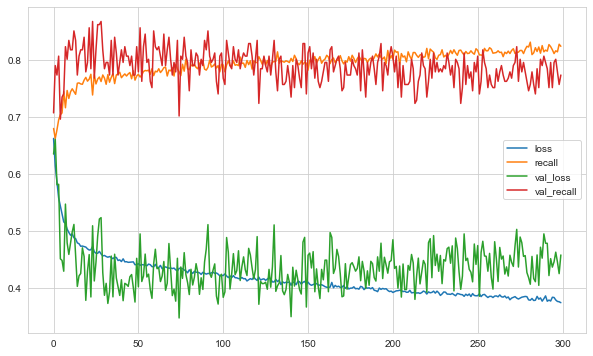

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# OK, the best is still 0.001

32/32 [==============================] - 0s 1ms/step
[[626 170]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.73      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



### Add Dropout Layer

In [73]:
from tensorflow.keras.layers import Dropout

In [74]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.25))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [75]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.7145 - recall: 0.6150 - val_loss: 0.7112 - val_recall: 0.8950
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6924 - recall: 0.5956 - val_loss: 0.6990 - val_recall: 0.7901
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6746 - recall: 0.5841 - val_loss: 0.6414 - val_recall: 0.6188
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6728 - recall: 0.5781 - val_loss: 0.6398 - val_recall: 0.6519
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6587 - recall: 0.5829 - val_loss: 0.6565 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6525 - recall: 0.6301 - val_loss: 0.6158 - val_recall: 0.6796
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6388 - recall: 0.6229 - val_loss: 0.6279 - val_recall: 0.7238
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4842 - recall: 0.7682 - val_loss: 0.4428 - val_recall: 0.8066
Epoch 120/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4863 - recall: 0.7688 - val_loss: 0.4207 - val_recall: 0.7956
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4922 - recall: 0.7585 - val_loss: 0.4265 - val_recall: 0.7901
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4856 - recall: 0.7857 - val_loss: 0.4532 - val_recall: 0.8232
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4837 - recall: 0.7766 - val_loss: 0.4457 - val_recall: 0.8122
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4918 - recall: 0.7845 - val_loss: 0.4257 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4833 - recall: 0.7742 - val_loss: 0.4432 - val_recall: 0.8122
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4783 - recall: 0.7845 - val_loss: 0.4347 - val_recall: 0.7956
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4786 - recall: 0.7954 - val_loss: 0.4203 - val_recall: 0.7956
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4788 - recall: 0.7730 - val_loss: 0.4186 - val_recall: 0.8011
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4818 - recall: 0.7857 - val_loss: 0.4158 - val_recall: 0.8011
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4787 - recall: 0.7809 - val_loss: 0.4151 - val_recall: 0.7901
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4744 - recall: 0.7742 - val_loss: 0.4138 - val_recall: 0.7901
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4832 - recall: 0.7821 - val_loss: 0.4235 - val_recall: 0.7845
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4731 - recall: 0.8008 - val_loss: 0.4078 - val_recall: 0.7790
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4722 - recall: 0.7857 - val_loss: 0.4089 - val_recall: 0.7845
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4767 - recall: 0.7827 - val_loss: 0.4181 - val_recall: 0.7901
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4747 - recall: 0.7869 - val_loss: 0.4246 - val_recall: 0.8066
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4800 - recall: 0.7797 - val_loss: 0.4178 - val_recall: 0.7845
Epoch 242/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4766 - recall: 0.7833 - val_loss: 0.4188 - val_recall: 0.7901
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4761 - recall: 0.7645 - val_loss: 0.4104 - val_recall: 0.7735
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4722 - recall: 0.7748 - val_loss: 0.4079 - val_recall: 0.7901
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4703 - recall: 0.8002 - val_loss: 0.4267 - val_recall: 0.8011
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4627 - recall: 0.7875 - val_loss: 0.4299 - val_recall: 0.7956
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4702 - recall: 0.7924 - val_loss: 0.4330 - val_recall: 0.8122
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4675 - recall: 0.8039 - val_loss: 0.4118 - val_recall: 0.7956


<AxesSubplot:>

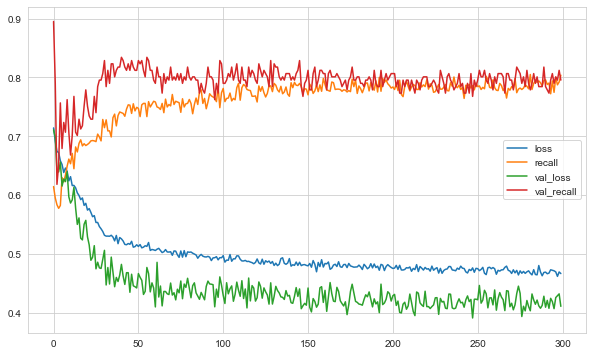

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [77]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[625 171]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.78      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [78]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [79]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [80]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6891 - recall: 0.5406 - val_loss: 0.6452 - val_recall: 0.6740
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6608 - recall: 0.6925 - val_loss: 0.6748 - val_recall: 0.7790
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6262 - recall: 0.6737 - val_loss: 0.5850 - val_recall: 0.7735
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6063 - recall: 0.6858 - val_loss: 0.5589 - val_recall: 0.8177
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5798 - recall: 0.6925 - val_loss: 0.5076 - val_recall: 0.7624
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5552 - recall: 0.6961 - val_loss: 0.4311 - val_recall: 0.7569
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5481 - recall: 0.7155 - val_loss: 0.5086 - val_recall: 0.8343
Epoch 8/300
64/64 [======================

<AxesSubplot:>

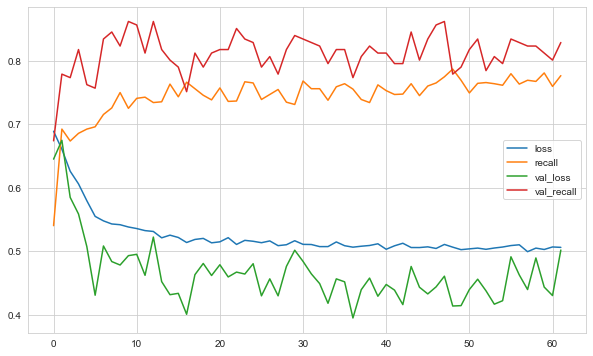

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [82]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) #There is overfitting. Let's try once again. Maybe it stuck in a local minimum

32/32 [==============================] - 0s 1ms/step
[[663 133]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       796
           1       0.52      0.70      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.77      0.73      1000
weighted avg       0.83      0.81      0.82      1000



### Retry 

In [83]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [84]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [85]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6765 - recall: 0.5890 - val_loss: 0.6333 - val_recall: 0.6740
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6565 - recall: 0.5975 - val_loss: 0.6889 - val_recall: 0.8177
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6261 - recall: 0.6580 - val_loss: 0.5613 - val_recall: 0.6519
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5978 - recall: 0.6447 - val_loss: 0.5198 - val_recall: 0.6630
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5840 - recall: 0.6749 - val_loss: 0.5109 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5630 - recall: 0.7010 - val_loss: 0.4538 - val_recall: 0.7182
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5568 - recall: 0.7088 - val_loss: 0.4730 - val_recall: 0.7901
Epoch 8/300
64/64 [======================

In [86]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

32/32 [==============================] - 0s 1ms/step
[[631 165]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.72      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



#### Monitor the "val_recall" as metric

In [87]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [88]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [89]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6873 - recall: 0.5860 - val_loss: 0.6502 - val_recall: 0.6298
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6541 - recall: 0.6586 - val_loss: 0.6867 - val_recall: 0.8508
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6137 - recall: 0.6780 - val_loss: 0.5457 - val_recall: 0.6851
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6052 - recall: 0.6634 - val_loss: 0.5721 - val_recall: 0.7956
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5859 - recall: 0.6901 - val_loss: 0.4971 - val_recall: 0.6906
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5672 - recall: 0.6792 - val_loss: 0.4597 - val_recall: 0.7348
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5563 - recall: 0.7209 - val_loss: 0.4970 - val_recall: 0.7901
Epoch 8/300
64/64 [======================

In [90]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) # Slightly better. Let's change the dropout function

32/32 [==============================] - 0s 1ms/step
[[502 294]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       796
           1       0.37      0.83      0.51       204

    accuracy                           0.67      1000
   macro avg       0.65      0.73      0.63      1000
weighted avg       0.82      0.67      0.70      1000



## GridSearchCV

In [91]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [92]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [93]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)

In [94]:
tf.random.set_seed(seed)
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 0.6906 - recall: 0.3904 - val_loss: 0.6612 - val_recall: 0.6022
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6674 - recall: 0.5508 - val_loss: 0.6309 - val_recall: 0.7127
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6397 - recall: 0.6410 - val_loss: 0.5865 - val_recall: 0.7017
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6225 - recall: 0.6834 - val_loss: 0.5539 - val_recall: 0.6630
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6098 - recall: 0.6883 - val_loss: 0.5261 - val_recall: 0.6685
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5912 - recall: 0.7088 - val_loss: 0.4845 - val_recall: 0.7182
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5712 - recall: 0.7155 - val_loss: 0.4763 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9C613D520>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [95]:
grid_model.best_score_

0.8749826827223256

In [96]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [97]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
23,0.875,0.021,1,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
14,0.852,0.170,2,"{'batch_size': 256, 'learn_rate': 0.001, 'opti..."
21,0.851,0.057,3,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
9,0.826,0.059,4,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
4,0.825,0.040,5,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
17,0.823,0.040,6,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
11,0.817,0.040,7,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
8,0.814,0.053,8,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
20,0.804,0.022,9,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
3,0.801,0.036,10,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."


In [98]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[508 288]
 [ 31 173]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       796
           1       0.38      0.85      0.52       204

    accuracy                           0.68      1000
   macro avg       0.66      0.74      0.64      1000
weighted avg       0.83      0.68      0.71      1000



32/32 [==============================] - 0s 1ms/step


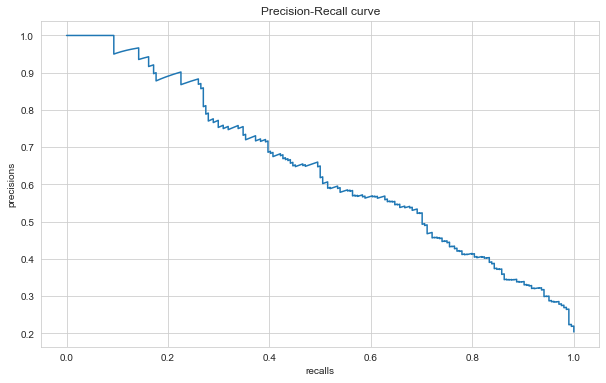

In [99]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [100]:
average_precision_score(y_test, y_pred_proba)

0.6431201366403417

# Final Model and Model Deployment

In [101]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [102]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = RMSprop(lr = 0.003)

model.compile(optimizer= opt,
              loss = "binary_crossentropy",
              metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_recall",
                           mode = "max" , 
                           verbose = 1,
                           patience = 15,
                           restore_best_weights = True)

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 1s 4ms/step - loss: 0.6384 - recall: 0.6050 - val_loss: 0.5833 - val_recall: 0.6373
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5937 - recall: 0.6656 - val_loss: 0.5652 - val_recall: 0.6471
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5725 - recall: 0.6907 - val_loss: 0.5520 - val_recall: 0.6814
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5480 - recall: 0.7059 - val_loss: 0.5086 - val_recall: 0.6961
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5251 - recall: 0.7294 - val_loss: 0.5229 - val_recall: 0.7402
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5128 - recall: 0.7332 - val_loss: 0.5258 - val_recall: 0.7500
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5019 - recall: 0.7447 - val_loss: 0.4264 - val_recall: 0.6324
Epoch 8/200
71/71 [======================

<AxesSubplot:>

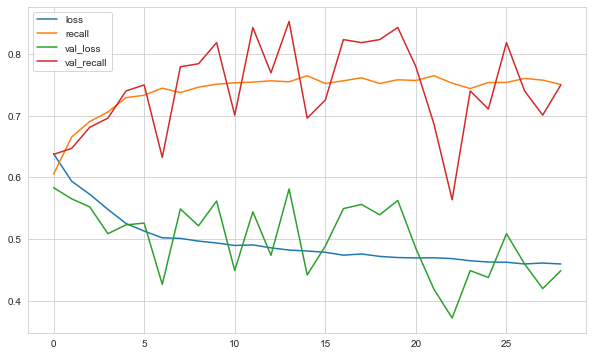

In [103]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [104]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[503 293]
 [ 30 174]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.76       796
           1       0.37      0.85      0.52       204

    accuracy                           0.68      1000
   macro avg       0.66      0.74      0.64      1000
weighted avg       0.83      0.68      0.71      1000



In [105]:
model.save('model_churn.h5')

## Prediction

In [106]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore          619.000
Geography              0.000
Gender                 0.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Name: 0, dtype: float64

In [107]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489]])

In [108]:
model.predict(single_customer)

1/1 [==============================] - 0s 18ms/step


array([[0.7385355]], dtype=float32)

In [109]:
df["Exited"].iloc[0]

1